# Descriptive Analysis

In [1]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing data
df = pd.read_csv('../Data/cleaned_fetal_health.csv')
df.head()

# separating features and target variable
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

### Summary Statistics

In [2]:
# Calculate and print mean and standard deviation for all variables
for column in X.columns:
    mean = X[column].mean().__round__(3)
    std = X[column].std().__round__(3)
    print(f"{column}: Mean = {mean}, SD = {std}\n")

baseline_value: Mean = 133.304, SD = 9.841

accelerations: Mean = 0.003, SD = 0.004

fetal_movement: Mean = 0.009, SD = 0.047

uterine_contractions: Mean = 0.004, SD = 0.003

light_decelerations: Mean = 0.002, SD = 0.003

severe_decelerations: Mean = 0.0, SD = 0.0

prolongued_decelerations: Mean = 0.0, SD = 0.001

abnormal_short_term_variability: Mean = 46.99, SD = 17.193

mean_value_of_short_term_variability: Mean = 1.333, SD = 0.883

percentage_of_time_with_abnormal_long_term_variability: Mean = 9.847, SD = 18.397

mean_value_of_long_term_variability: Mean = 8.188, SD = 5.628



### Exploratory visualizations

Histograms to show distribution for all features

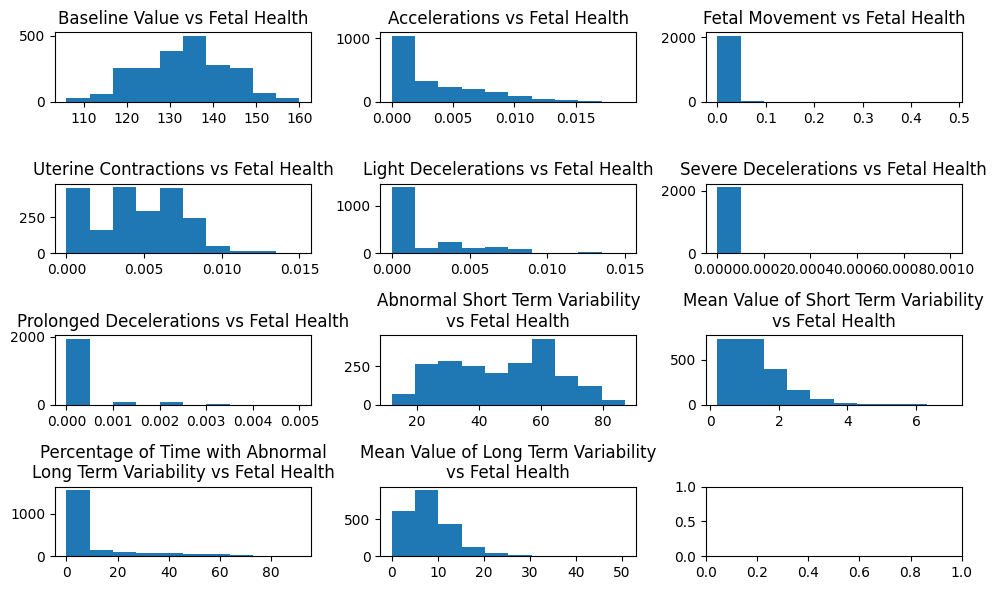

In [3]:
# Histograms showing distribution for each feature 
fig, ax = plt.subplots(4, 3, figsize=(10, 6))

ax[0,0].hist(X['baseline_value'])
ax[0,0].set_title('Baseline Value vs Fetal Health')

ax[0,1].hist(X['accelerations'])
ax[0,1].set_title('Accelerations vs Fetal Health')

ax[0,2].hist(X['fetal_movement'])
ax[0,2].set_title('Fetal Movement vs Fetal Health')

ax[1,0].hist(X['uterine_contractions'])
ax[1,0].set_title('Uterine Contractions vs Fetal Health')

ax[1,1].hist(X['light_decelerations'])
ax[1,1].set_title('Light Decelerations vs Fetal Health')

ax[1,2].hist(X['severe_decelerations'])
ax[1,2].set_title('Severe Decelerations vs Fetal Health')

ax[2,0].hist(X['prolongued_decelerations'])
ax[2,0].set_title('Prolonged Decelerations vs Fetal Health') 

ax[2,1].hist(X['abnormal_short_term_variability'])
ax[2,1].set_title('Abnormal Short Term Variability\nvs Fetal Health')

ax[2,2].hist(X['mean_value_of_short_term_variability'])
ax[2,2].set_title('Mean Value of Short Term Variability\nvs Fetal Health')

ax[3,0].hist(X['percentage_of_time_with_abnormal_long_term_variability'])
ax[3,0].set_title('Percentage of Time with Abnormal\nLong Term Variability vs Fetal Health')

ax[3,1].hist(X['mean_value_of_long_term_variability'])
ax[3,1].set_title('Mean Value of Long Term Variability\nvs Fetal Health')


plt.tight_layout()
plt.show()

Looking more in-depth at the distribution of `baseline_value`, `uterine_contractions` and `abnormal_short_term_variability` because these are the variables that seem to have the biggest variation in their distribution, based on the histograms above. We chose to use violinplots because they show the distribution of the data, as well as the density at different values. We included quartiles ranges within the violinplots to give more context to the distribution. Additionally, we separated the plots by `fetal_health` to show differences of the features across the different classes.

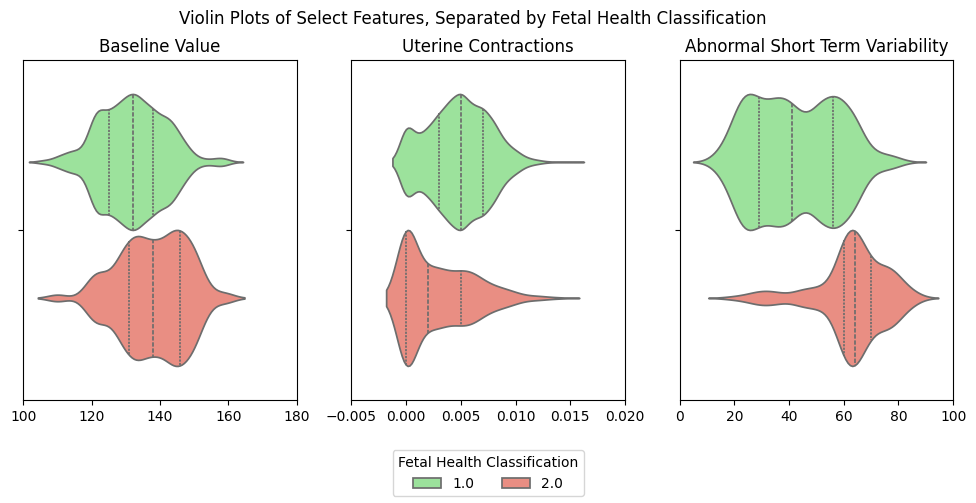

In [4]:
# Violinplots for baseline_value, uterine_contractions, and abnormal_short_term_variability
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Create custom palette to represent the fetal health classes
palette={1: "lightgreen", 2: "salmon"}

# Features to make violin plots for 
cols = {'Baseline Value': X['baseline_value'],
        'Uterine Contractions': X['uterine_contractions'],
        'Abnormal Short Term Variability': X['abnormal_short_term_variability']}

# Initialize index for ax
i = 0

# For loop to create violin plots for each selected feature
for c in cols:
    # Violinplot, separated by fetal health classification
    sns.violinplot(x=cols[c], hue=y, palette=palette, inner='quartile', ax=ax[i])
    # Add title, which is just feature name 
    ax[i].set_title(c)
    # Remove individual legends
    ax[i].legend_.remove() 
    # Remove x labels
    ax[i].set_xlabel('')
    # Increment index for ax 
    i += 1

# Adjust individual x axis limits
ax[0].set_xlim(100, 180)
ax[1].set_xlim(-0.005, 0.02)
ax[2].set_xlim(0, 100)

# Create one overall title
fig.suptitle('Violin Plots of Select Features, Separated by Fetal Health Classification') 

# Create shared legend for fetal health classes
plt.subplots_adjust(bottom=0.2)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, title='Fetal Health Classification')

In [5]:
print(f"Y shape: {y.shape}\n")
print(y)

Y shape: (2126,)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64


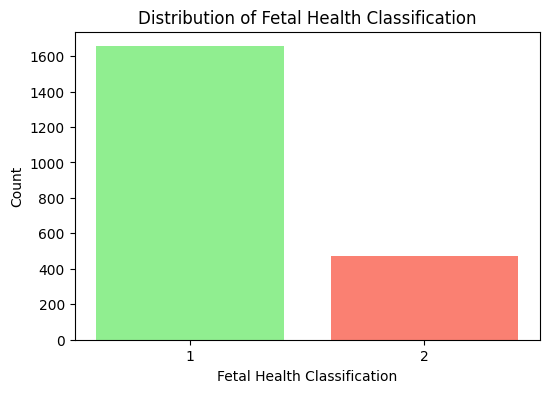

In [ ]:
# Histogram for fetal health
plt.figure(figsize=(6,4))
# Create counts to count number of times 1 or 2 appears 
counts = y.value_counts().sort_index()

# Create custom palette to represent the fetal health classes
palette={1: "lightgreen", 2: "salmon"}

# Create bar chart using counts 
plt.bar(counts.index, counts.values, color=palette.values())

# Create x-ticks for 1 or 2 
plt.xticks(counts.index)

# Add title and axis labels 
plt.title('Distribution of Fetal Health Classification')
plt.xlabel('Fetal Health Classification')
plt.ylabel('Count')

plt.show()

Scatterplots to show relationships between each feature and target variable

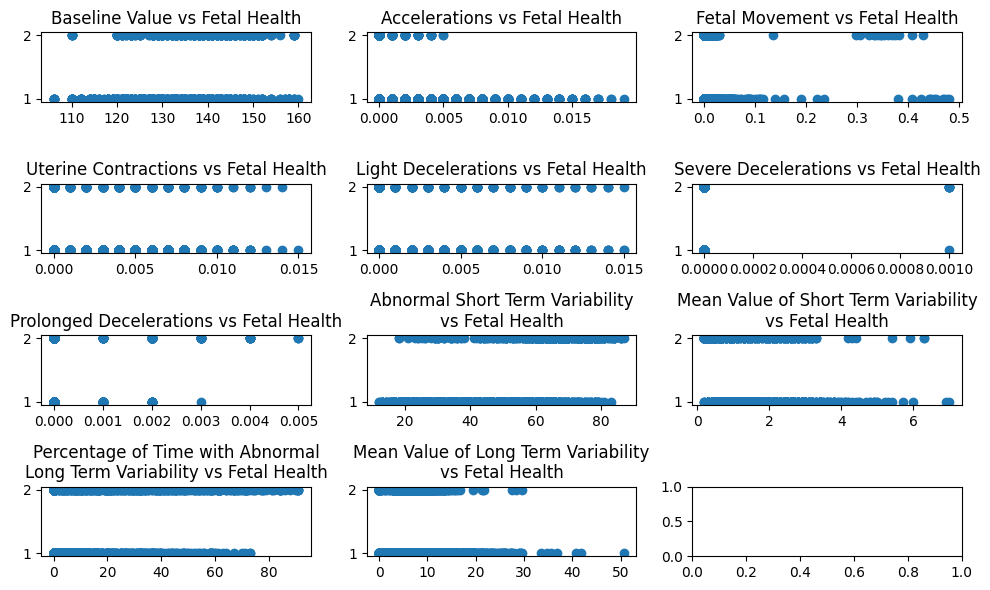

In [7]:
# Scatterplot comparing all variables to target variable 
fig, ax = plt.subplots(4, 3, figsize=(10, 6))

ax[0,0].scatter(X['baseline_value'], y)
ax[0,0].set_title('Baseline Value vs Fetal Health')

ax[0,1].scatter(X['accelerations'], y)
ax[0,1].set_title('Accelerations vs Fetal Health')

ax[0,2].scatter(X['fetal_movement'], y)
ax[0,2].set_title('Fetal Movement vs Fetal Health')

ax[1,0].scatter(X['uterine_contractions'], y)
ax[1,0].set_title('Uterine Contractions vs Fetal Health')

ax[1,1].scatter(X['light_decelerations'], y)
ax[1,1].set_title('Light Decelerations vs Fetal Health')

ax[1,2].scatter(X['severe_decelerations'], y)
ax[1,2].set_title('Severe Decelerations vs Fetal Health')

ax[2,0].scatter(X['prolongued_decelerations'], y)
ax[2,0].set_title('Prolonged Decelerations vs Fetal Health') 

ax[2,1].scatter(X['abnormal_short_term_variability'], y)
ax[2,1].set_title('Abnormal Short Term Variability\nvs Fetal Health')

ax[2,2].scatter(X['mean_value_of_short_term_variability'], y)
ax[2,2].set_title('Mean Value of Short Term Variability\nvs Fetal Health')

ax[3,0].scatter(X['percentage_of_time_with_abnormal_long_term_variability'], y)
ax[3,0].set_title('Percentage of Time with Abnormal\nLong Term Variability vs Fetal Health')

ax[3,1].scatter(X['mean_value_of_long_term_variability'], y)
ax[3,1].set_title('Mean Value of Long Term Variability\nvs Fetal Health')


plt.tight_layout()
plt.show()

Heatmap to show correlations between features

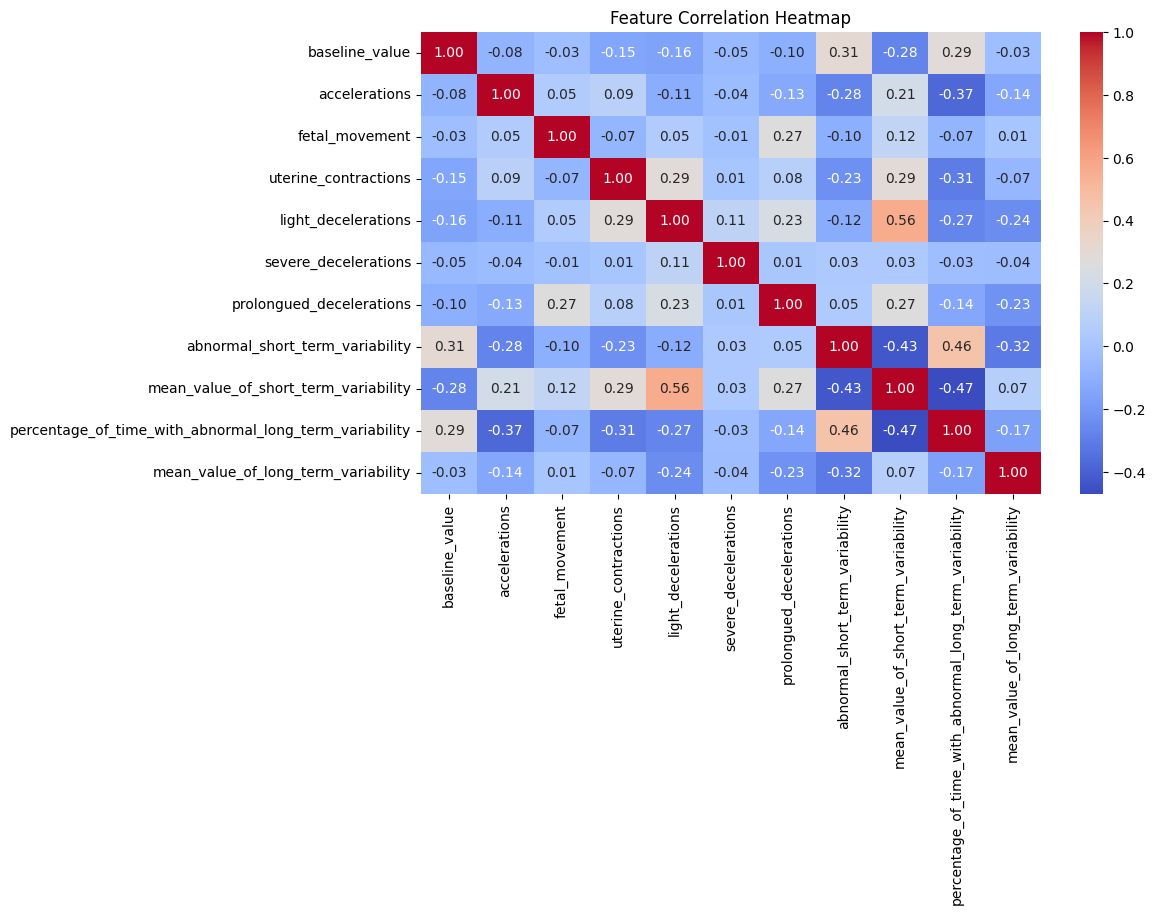

In [8]:
# Heatmap to show correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()